In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('data.csv')

df.rename(columns ={'num       ': 'num'},inplace=True)
df.drop(['slope','ca','thal'],axis=1, inplace=True)
df.replace('?', np.nan, inplace=True)

for i in ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [4]:
num_0 = df[df['num'] == 0]
num_1 = df[df['num'] == 1]

train_num_0, test_num_0 = train_test_split(num_0, test_size=0.2)
train_num_1, test_num_1 = train_test_split(num_1, test_size=0.2)

test_data = pd.concat([test_num_0, test_num_1])
train_data = pd.concat([train_num_0, train_num_1])

test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
165,55,1,4,140,229,0,0,110,1,0.5,0
50,41,1,2,125,269,0,0,144,0,0.0,0
148,54,1,2,110,208,0,0,142,0,0.0,0
22,37,0,4,130,173,0,1,184,0,0.0,0
77,45,1,4,140,224,0,0,144,0,0.0,0


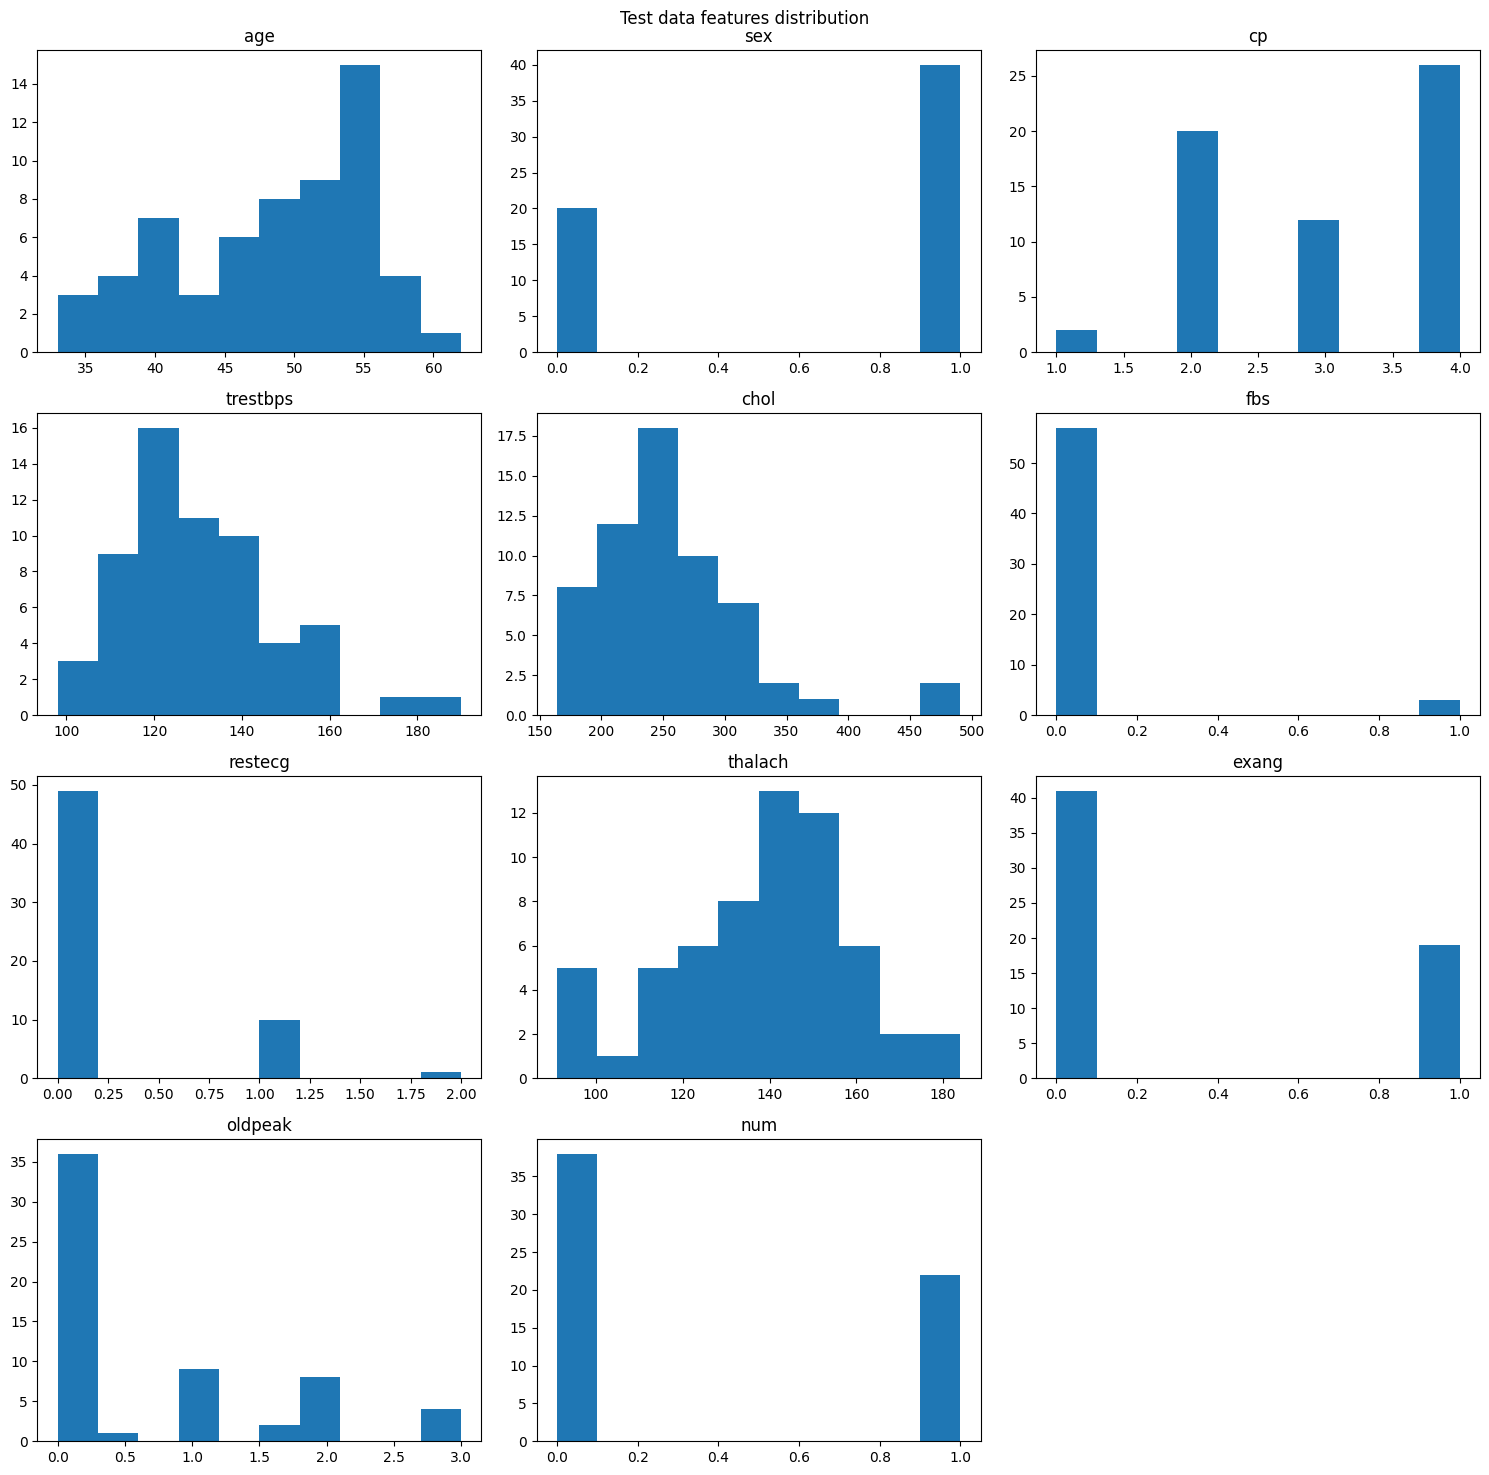

In [5]:
test_data.head()
feature = 0
fig, axs = plt.subplots(4,3,figsize=(15,15))
fig.suptitle('Test data features distribution')
for i in range(4):
  for j in range(3):
    axs[i][j].set_title(f'{test_data.columns[feature]}')
    axs[i][j].hist(np.asarray(test_data[test_data.columns[feature]] ,float))
    feature += 1
    if feature > 10:
      break

fig.delaxes(axs[3][2])
fig.tight_layout()

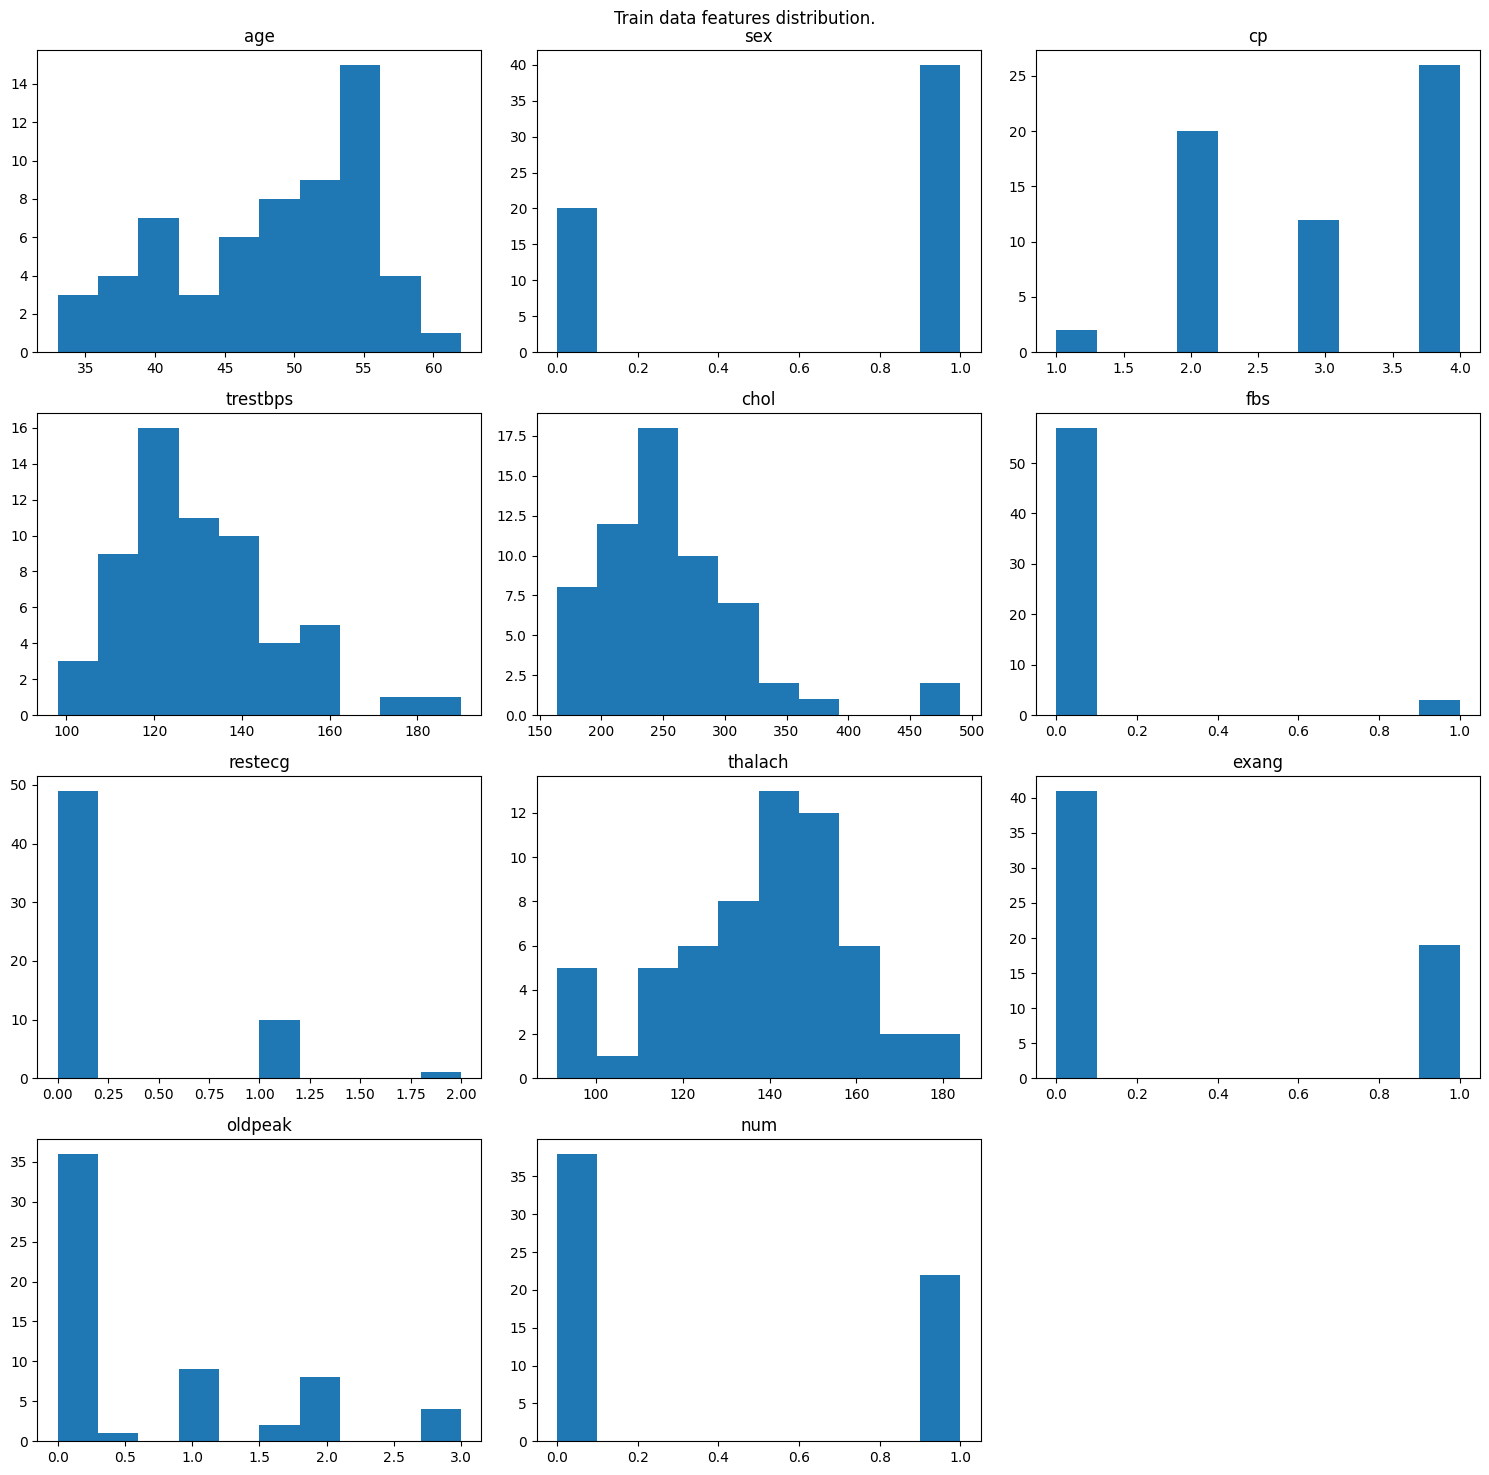

In [6]:
train_data.head()
feature = 0
fig, axs = plt.subplots(4,3,figsize=(15,15))
fig.suptitle('Train data features distribution.')
for i in range(4):
  for j in range(3):
    axs[i][j].set_title(f'{train_data.columns[feature]}')
    axs[i][j].hist(np.asarray(test_data[train_data.columns[feature]], float))
    feature += 1
    if feature > 10:
      break

fig.delaxes(axs[3][2])
fig.tight_layout()

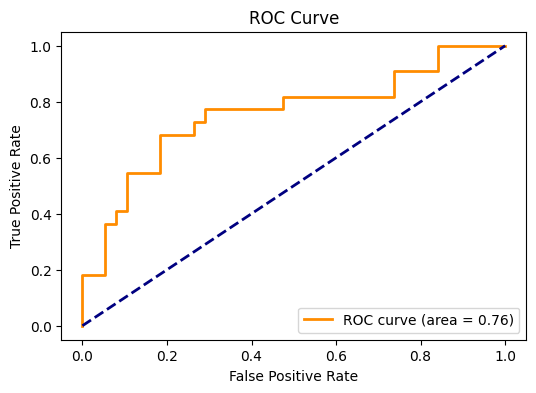

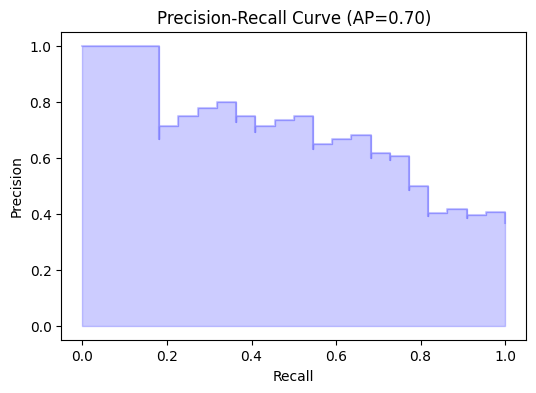

In [10]:
selected = ['age','sex','cp','chol']
target = 'num'

train_1 = train_data[selected + [target]].dropna()
test_1 = test_data[selected + [target]].dropna()

x_train_1 = train_1[selected]
x_test_1 = test_1[selected]
y_train_1 = train_1[target]
y_test_1 = test_1[target]

model = make_pipeline(SimpleImputer(strategy='mean'), LogisticRegression(max_iter=1000))
model.fit(x_train_1, y_train_1)

y_score = model.predict_proba(x_test_1)

fpr, tpr, _ = roc_curve(y_test_1.ravel(), y_score[:, 1].ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test_1.ravel(), y_score[:, 1].ravel())
average_precision = average_precision_score(y_test_1.ravel(), y_score[:, 1].ravel())

plt.figure(figsize=(6, 4))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.show()

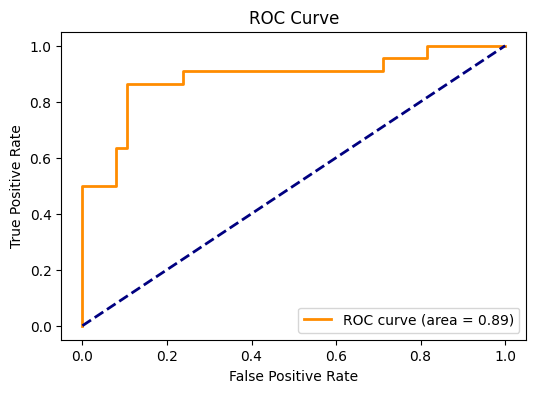

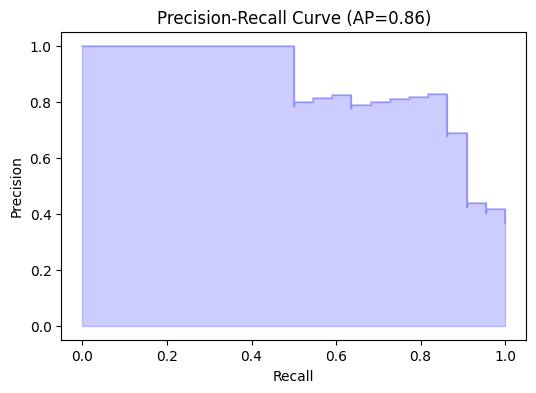

In [8]:
selected = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']
target = 'num'

train_2 = train_data[selected + [target]].dropna()
test_2 = test_data[selected + [target]].dropna()

x_train_2 = train_2[selected]
x_test_2 = test_2[selected]
y_train_2 = train_2[target]
y_test_2 = test_2[target]

model = make_pipeline(SimpleImputer(strategy='mean'), LogisticRegression(max_iter=1000))
model.fit(x_train_2, y_train_2)

y_score = model.predict_proba(x_test_2)

fpr, tpr, _ = roc_curve(y_test_2.ravel(), y_score[:, 1].ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test_2.ravel(), y_score[:, 1].ravel())
average_precision = average_precision_score(y_test_2.ravel(), y_score[:, 1].ravel())

plt.figure(figsize=(6, 4))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.show()